Lambda School Data Science

*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: Student should be able to discuss the importance of batch size
* <a href="#p3">Part 3</a>: Student should be able to discuss the importance of learning rate

## Summary of Yesterday

Yesterday, we learned about some of the principal components of Neural Networks: Neurons, Weights, Activation Functions, and layers (input, output, & hidden). Today, we will reinforce our understanding of those components and introduce the mechanics of training a neural network. Feed-forward neural networks, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of gradient descent where the gradient has been calculated by backpropagation.

  <center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: input, hidden, and output layers.
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Signal is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (think arrow/connecting line)
 - Adding a bias to this weighted some of inputs and weights
 - Activating this weighted sum + bias by squishifying it with sigmoid or some other activation function. With a single perceptron with three inputs, calculating the output from the node is done like so:
\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}
 - this final activated value is the signal that gets passed onto the next layer of the network.
 

## Training a Neural Network: *Formal Summary*

0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly initialize weights
2. Implement forward propagation to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a cost function $J(\theta)$
4. Implement backpropagation to compute partial derivatives $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use gradient descent (or other advanced optimizer) with backpropagation to minimize $J(\theta)$ as a function of parameters $\theta\$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

------
# Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, [3Blue1Brown's video is a great starting place](https://www.youtube.com/watch?v=tIeHLnjs5U8). I also highly recommend this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

### What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

### Review: A basic derivative 

![](https://ginsyblog.files.wordpress.com/2017/02/derivativelimitdef.gif)

### Gradients: Multi-dimensional derivatives

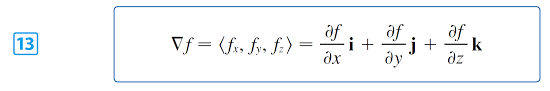



Because a derivative can have a component in multiple dimensions, we define a gradient as a multi-dimensional derivative that takes on the form of a vector. Why a vector? Because gradients have both direction and magnitude. 

**In short, gradients point in the direction of greatest change.**
![](https://i.stack.imgur.com/OI6Gy.gif)

### Gradient Descent Formula 
This is a general formula for standard Gradient Descent. 
![](https://media.geeksforgeeks.org/wp-content/uploads/20200611183120/1406-7.png)

There are more sophisticated versions of gradient descent commonly referred to as [**Adaptive Gradient Descent**](https://ruder.io/optimizing-gradient-descent/). 


These adaptive models all build off of this simple equation, so it's best to first understand the standard form of Gradient Descent, then move on to more sophisticated versions. 

### Geometry of Gradient Descent 

![](https://i.stack.imgur.com/yk1mk.png)

## Convex vs. Non-Convex

Loss curves won't always have a single minimum point for gradient descent to converge towards. Sometimes there are multiple minimums. 

**Global Minimum:** The absolute minimum location of a curve (or surface). 

**Local Minimum:** The local minimum location of a curve (or surface). 

### In 2-Dimensions
![](https://lh3.googleusercontent.com/o0J1qW2PhvrgsPbYzKgnuNGDyjZF7wug3OBwDPwY5LXD0Vjg3t3otN6ecZ64K8J62sNonpvZxzKTs0pMr9YniDUmQC5J-IFXmSNvRJTbxr9kyAfNP-_A7HdC8hEa9x1dDgnf9jSp)


### In 3-Dimensions 
In Calculus, those ambiguous points that take on the form of both local mins and local maxs are known as [**Saddle points**](https://en.wikipedia.org/wiki/Saddle_point). It's not necessary to dive into the mathematics, the key take away is that non-convex error curves (and surfaces) have this global/local minimum issue. 

![](https://www.oreilly.com/radar/wp-content/uploads/sites/3/2019/06/convex-non-convex-9c8cb9320d4b0392c5f67004e8832e85.jpg)


**Take Away:** The issue is that you might think that gradient descent has converged toward a global minimum but it might actually be stuck in a local minimum. 

There are at least 2 possible solutions to this problem: 

1) Use different appraoches to randomly initalizing your model weights
For this check out [Keras's docs on Weight Initializers](https://keras.io/api/layers/initializers/). Treat these weight initializers as just another hyper-parameter to include in your gridsearch. It's a good idea to get into the practice of including these in your gridsearches. 


2) Use non-gradient descent optimizers such as [Particle Swarm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) or [Genetic Algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm). Feel free to read up on these appraoches but know that **you are not expected to know these appraoches** and they are outside the scope of this course. 

------
## Follow Along

In this section, we will again build a simple neural network using base TensorFlow. We'll focus on using a __Feed Forward Neural Network__ to predict test scores. 

### Generate some Fake Data

In [1]:
# ploting 
import matplotlib.pyplot as plt

# dataset iimport
from tensorflow.keras.datasets import mnist

# tensorflow imports for building 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
%matplotlib inline

In [4]:
# Imagine that our data is drawn from a linear function

# linear regression assumes normally distributed data 

# y_hat =  x * w  + b  + error/noise

TRUE_W = 3.5
TRUE_b = 50
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_b + noise

### Loss Function
Here we will use Mean Squared Error (MSE), because this is a regression problem. We are trying to predict a continuous target.

![](https://miro.medium.com/max/808/1*-e1QGatrODWpJkEwqP4Jyg.png)

In [5]:
def loss(target_y, predicted_y, model, reg_strength=0.0):
    """
    Implements Mean Square Error (MSE) as the loss function
    """
    return tf.reduce_mean(tf.square(target_y - predicted_y))

### Neural Network Architecture
Lets create a Neural Network class called "Model" to contain this functionality. Note: This is essentially a linear regression whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex function like the multi-layer networks we constructed yesterday.

In [8]:
class Model(object):

    def __init__(self):
        self.W = tf.Variable(8.0)
        self.b = tf.Variable(40.0)

    def __call__(self, x):
        # returns m*x + b 
        return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 64.0

### Initial Weights
The initial weights in our model were arbitrary. In practice, weights are initialized randomly. 

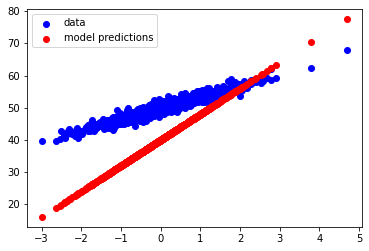

Current loss: 119.048630


In [9]:
plt.scatter(inputs, outputs, c='b', label = "data")
plt.scatter(inputs, model(inputs), c='r', label = "model predictions")
plt.legend()
plt.show();

print('Current loss: %1.6f' % loss(model(inputs), outputs, model).numpy())

### Update Weights Based on Gradient

> *Assigning blame for bad predictions and delivering justice - repeatedly and a little bit at a time*

You should also know that with neural networks it is common to have gradients that are not convex (like what we saw when we applied gradient descent to linear regression). 

Due to the high complexity of these models and their nonlinearity, it is common for gradient descent to get stuck in a local minimum, but there are ways to combat this:

1) Stochastic Gradient Descent

2) More advanced Gradient-Descent-based "Optimizers" - See Stretch Goals on assignment.

In [10]:
 def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t: 
        
        # calculate the loss/error value from our model's predictions

        # calculate the gradient of the loss function wrt to W and wrt B 

        # update the value of W using the lr * the rate of change of the loss function wrt W 

        # update the value of b using the lr * the rate of change of the loss function wrt b        

        current_loss = loss(outputs, model(inputs), model)
        
        dW, db = t.gradient(current_loss, [model.W, model.b])
        
        model.W.assign_sub(learning_rate * dW)

        model.b.assign_sub(learning_rate * db)

### Train the Network

In [15]:
model = Model()

# Store Some history of weights
Ws, bs = [], []
epochs = range(15)

for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    y_hat =  model(inputs)
    current_loss = loss(outputs, y_hat, model)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=8.00 b=40.00 loss=119.04863
Epoch  1: W=7.12 b=41.98 loss=76.77145
Epoch  2: W=6.41 b=43.57 loss=49.63323
Epoch  3: W=5.84 b=44.83 loss=32.21262
Epoch  4: W=5.39 b=45.85 loss=21.02982
Epoch  5: W=5.02 b=46.66 loss=13.85111
Epoch  6: W=4.72 b=47.31 loss=9.24273
Epoch  7: W=4.48 b=47.84 loss=6.28435
Epoch  8: W=4.29 b=48.25 loss=4.38515
Epoch  9: W=4.13 b=48.59 loss=3.16592
Epoch 10: W=4.01 b=48.85 loss=2.38318
Epoch 11: W=3.91 b=49.07 loss=1.88066
Epoch 12: W=3.83 b=49.24 loss=1.55804
Epoch 13: W=3.77 b=49.38 loss=1.35092
Epoch 14: W=3.71 b=49.49 loss=1.21794


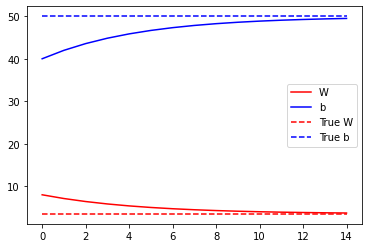

In [16]:
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

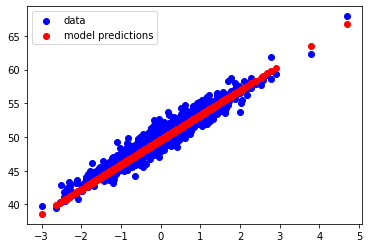

Current loss: 1.132557


In [17]:
plt.scatter(inputs, outputs, c='b', label = "data")
plt.scatter(inputs, model(inputs), c='r', label = "model predictions")
plt.legend()
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs, model).numpy())

## Challenge

In the module project, you will be asked to explain the logic of backpropagation and gradient descent.

# Batch Size (Learn)

## Overview

The What - Stochastic Gradient Descent calculates an approximation of the gradient over the entire dataset by reviewing the predictions of a random sample. 

The Why - *Speed*. Calculating the gradient over the entire dataset is extremely expensive computationally. 

### Batch Size
Batches are the number of observations our model is shown to make predictions and update the weights. Batches are selected randomly during epoch. All observations are considered when passing thru an epoch at some point.

* Smaller Batch = Slower Run Time (but maybe more accurate results)
* Default Batch = Balance between speed and accuracy
* Large Batch = Very fast, but not nearly as accurate.

### Baseline Model

In [18]:
# load data

# scale data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

max_pixel_value = 255
X_train = X_train / max_pixel_value
X_test = X_test / max_pixel_value
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [19]:
X_train = X_train.reshape((60000, -1))
X_test = X_test.reshape((10000, -1))
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


### Normalizing data helps your model learn

Whenever all data is normalized to values within 0 and 1, that ensures that the update to all the weights are updated in equal proportions which can lead to quicker convergence on the optimal weight values. 

**Hint:** if your dataset's values range accross multiple orders of magnitude (i.e. $10^1,~~10^2,~~10^3,~~10^4$), then gradient descent will update the weights in grossly uneven proportions.  


![](https://quicktomaster.com/wp-content/uploads/2020/08/contour_plot.png)

There's more to be said about Normalization and Gradient Descent, however there's not enough time! So I highly encourage you to [**read throught this very well written article that explores the impact of normalization on Gradient Descent in much greater detail.**](https://www.jeremyjordan.me/batch-normalization/) 

In [20]:
y_train[0:10]

# [0, 0, 0, 0, 1, 0, 0, 0, 0]  -> loss = 'categorical_crossentropy'

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [23]:
# create a function called create_model that accepts a learing rate for SGD as an input parameter 
# it should return a complied, 2 hidden layer neural net that uses SGD as the optimizer 
# Import SGD as discussed here: https://keras.io/api/optimizers/sgd/

# create create_model
def create_model(lr=.01):
    """
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """
    opt = SGD(learning_rate=lr)
    
    model = Sequential([
        Dense(32, activation='relu', input_dim=784),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [24]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


## Follow Along
Let's run a series of experiments for a default, small, and large batch size.

### Default
Batch Size is 32

In [35]:
# instantiate a model and fit it with batch size of 32
model = create_model()
bt_default = model.fit(X_train, y_train,
                       batch_size=32,
                       epochs=20, 
                       validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3184 - accuracy: 0.5998 - val_loss: 0.3843 - val_accuracy: 0.8938
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8943 - val_loss: 0.3014 - val_accuracy: 0.9131
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9150 - val_loss: 0.2657 - val_accuracy: 0.9224
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9236 - val_loss: 0.2394 - val_accuracy: 0.9300
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2380 - accuracy: 0.9340 - val_loss: 0.2208 - val_accuracy: 0.9329
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2219 - accuracy: 0.9377 - val_loss: 0.2052 - val_accuracy: 0.9394
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1968 - accuracy: 0.9449 - val_loss: 0.1868 - val_accuracy:

In [30]:
7500*5

37500

In [31]:
37500 / 1875

20.0

### Small Batch Size
Batch Size is 8

In [26]:
# instantiate a model and fit it with batch size of 8
model = create_model()
bt_small = model.fit(X_train, y_train,
                     batch_size=8,
                     epochs=5, 
                     validation_data=(X_test, y_test))

Epoch 1/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.8845 - accuracy: 0.7278 - val_loss: 0.2533 - val_accuracy: 0.9258
Epoch 2/5
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2399 - accuracy: 0.9299 - val_loss: 0.1988 - val_accuracy: 0.9422
Epoch 3/5
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1814 - accuracy: 0.9475 - val_loss: 0.1615 - val_accuracy: 0.9520
Epoch 4/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1483 - accuracy: 0.9560 - val_loss: 0.1445 - val_accuracy: 0.9578
Epoch 5/5
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1307 - accuracy: 0.9617 - val_loss: 0.1305 - val_accuracy: 0.9617


### Large Batch Size
Batch Size is 512

In [27]:
# instantiate a model and fit it with batch size of 512
model = create_model()
bt_large = model.fit(X_train, y_train,
                     batch_size=512,
                     epochs=5, 
                     validation_data=(X_test, y_test))

Epoch 1/5
118/118 [==============================] - 2s 9ms/step - loss: 2.2558 - accuracy: 0.1857 - val_loss: 1.9685 - val_accuracy: 0.4180
Epoch 2/5
118/118 [==============================] - 1s 4ms/step - loss: 1.8570 - accuracy: 0.4755 - val_loss: 1.4555 - val_accuracy: 0.6207
Epoch 3/5
118/118 [==============================] - 0s 3ms/step - loss: 1.3615 - accuracy: 0.6575 - val_loss: 1.0528 - val_accuracy: 0.7473
Epoch 4/5
118/118 [==============================] - 1s 5ms/step - loss: 1.0184 - accuracy: 0.7506 - val_loss: 0.8232 - val_accuracy: 0.7915
Epoch 5/5
118/118 [==============================] - 1s 6ms/step - loss: 0.8175 - accuracy: 0.7944 - val_loss: 0.6892 - val_accuracy: 0.8181


### Visualization of Results

In [32]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.906860,0.724750,0.399865,0.8822,0,32_
1,0.368505,0.893033,0.309301,0.9066,1,32_
2,0.300762,0.912817,0.271353,0.9201,2,32_
3,0.260128,0.925083,0.246465,0.9250,3,32_
4,0.230999,0.933450,0.218722,0.9342,4,32_


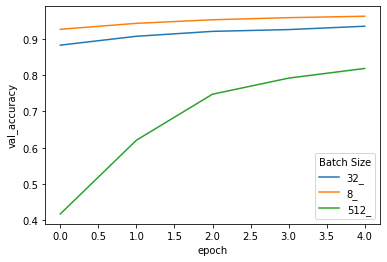

In [33]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

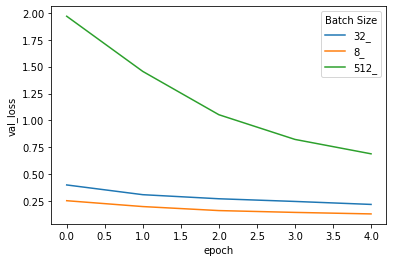

In [34]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

## Challenge

You will be expected to experiment with batch size on today's assignment.

# Learning Rate (Learn)

![](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

## Overview

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* Too high of a learning rate causes unstable results
* Too Low of a learning rate the model will underfit
* Goldy Locks parameters - it needs be "just right"
* Scale of 0-1

## Follow Along

Same experiment with Batch but different learning rates:
* High Learning = .75
* Default Learning = .01
* Low Learning Rate = .0001

### Default Learning Rate

In [36]:
# instantiate a model and fit it with a learning rate value of 0.01
model = create_model(lr=0.01)
lr_default = model.fit(X_train, y_train,
                       epochs=5, 
                       validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3107 - accuracy: 0.5841 - val_loss: 0.3706 - val_accuracy: 0.8899
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8955 - val_loss: 0.2882 - val_accuracy: 0.9174
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2856 - accuracy: 0.9163 - val_loss: 0.2572 - val_accuracy: 0.9253
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2506 - accuracy: 0.9279 - val_loss: 0.2284 - val_accuracy: 0.9339
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2241 - accuracy: 0.9376 - val_loss: 0.2100 - val_accuracy: 0.9395


### High Learning Rate

In [37]:
# instantiate a model and fit it with a learning rate value of 0.75
model = create_model(lr=0.75)
lr_high = model.fit(X_train, y_train,
                    epochs=5, 
                    validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6763 - accuracy: 0.3322 - val_loss: 0.9641 - val_accuracy: 0.5987
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0909 - accuracy: 0.5908 - val_loss: 0.8598 - val_accuracy: 0.7129
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9125 - accuracy: 0.6797 - val_loss: 1.0203 - val_accuracy: 0.5280
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9022 - accuracy: 0.6627 - val_loss: 0.6943 - val_accuracy: 0.7705
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6928 - accuracy: 0.7855 - val_loss: 0.6330 - val_accuracy: 0.7938


### Low Learning Rate

In [38]:
# instantiate a model and fit it with a learning rate value of 0.0001
model = create_model(lr=0.0001)
lr_low = model.fit(X_train, y_train,
                    epochs=5, 
                    validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3232 - accuracy: 0.0681 - val_loss: 2.2785 - val_accuracy: 0.1097
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2695 - accuracy: 0.1164 - val_loss: 2.2288 - val_accuracy: 0.1639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2212 - accuracy: 0.1694 - val_loss: 2.1809 - val_accuracy: 0.2058
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1749 - accuracy: 0.2089 - val_loss: 2.1330 - val_accuracy: 0.2360
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1279 - accuracy: 0.2366 - val_loss: 2.0845 - val_accuracy: 0.2580


### Visualization of Results

In [42]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_low, lr_high], [".01_", ".0001_", ".75_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.812146,0.755233,0.370633,0.8899,0,.01_
1,0.334632,0.902667,0.288157,0.9174,1,.01_
2,0.275736,0.920217,0.257157,0.9253,2,.01_
3,0.244737,0.929517,0.228439,0.9339,3,.01_
4,0.221464,0.937367,0.210014,0.9395,4,.01_


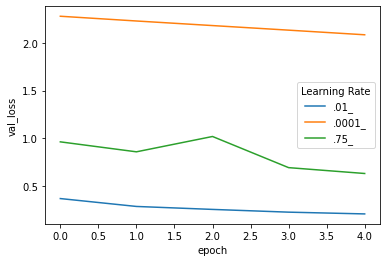

In [40]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

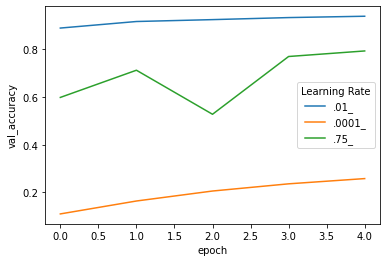

In [41]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

## Challenge

You will be expected to experiment with different learning rates today.

---

# Bonus: How do I know if my neural net is overfitting ?

Compare train & test losses (or learning metric like accuracy) and look for the gap between the curves. 


See [**this resource**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) for further details 

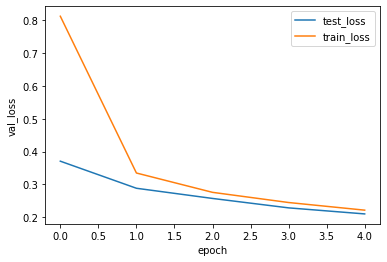

In [43]:
sns.lineplot(x='epoch', y='val_loss', data=df[df['Learning Rate']=='.01_'], label="test_loss")
sns.lineplot(x='epoch', y='loss', data=df[df['Learning Rate']=='.01_'], label="train_loss");

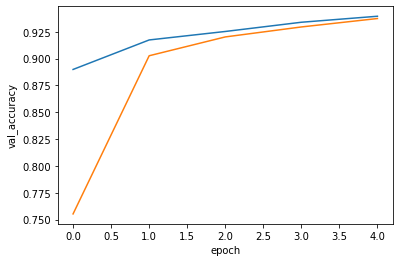

In [44]:
sns.lineplot(x='epoch', y='val_accuracy', data=df[df['Learning Rate']=='.01_'])
sns.lineplot(x='epoch', y='accuracy', data=df[df['Learning Rate']=='.01_']);